In [ ]:
# Diabetes Prediction Using Machine Learning
# This project implements various machine learning models to predict the
# onset of diabetes using the Pima Indians Diabetes dataset.
# The project includes data preprocessing, exploratory data analysis (EDA),
# and model training with hyperparameter tuning. Multiple classification
# models are evaluated and compared based on their accuracy.

# Dataset: Pima Indians Diabetes Dataset
# Models: Logistic Regression, K-Nearest Neighbors, Random Forest, Support Vector Machine, Decision Tree, Naive Bayes
# Techniques: EDA, feature scaling, train-test split, hyperparameter tuning (GridSearchCV)
# Tools: Python, Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn
# Outcome: Model accuracy comparison with visualization of results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

data = pd.read_csv(url, header=None, names=column_names)

In [ ]:
# EDA
print(data.head())
print(data.info())
print(data.describe())
print(data['Outcome'].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


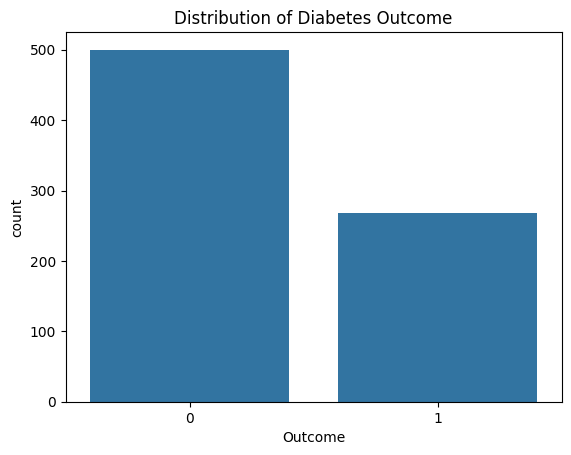

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.show()

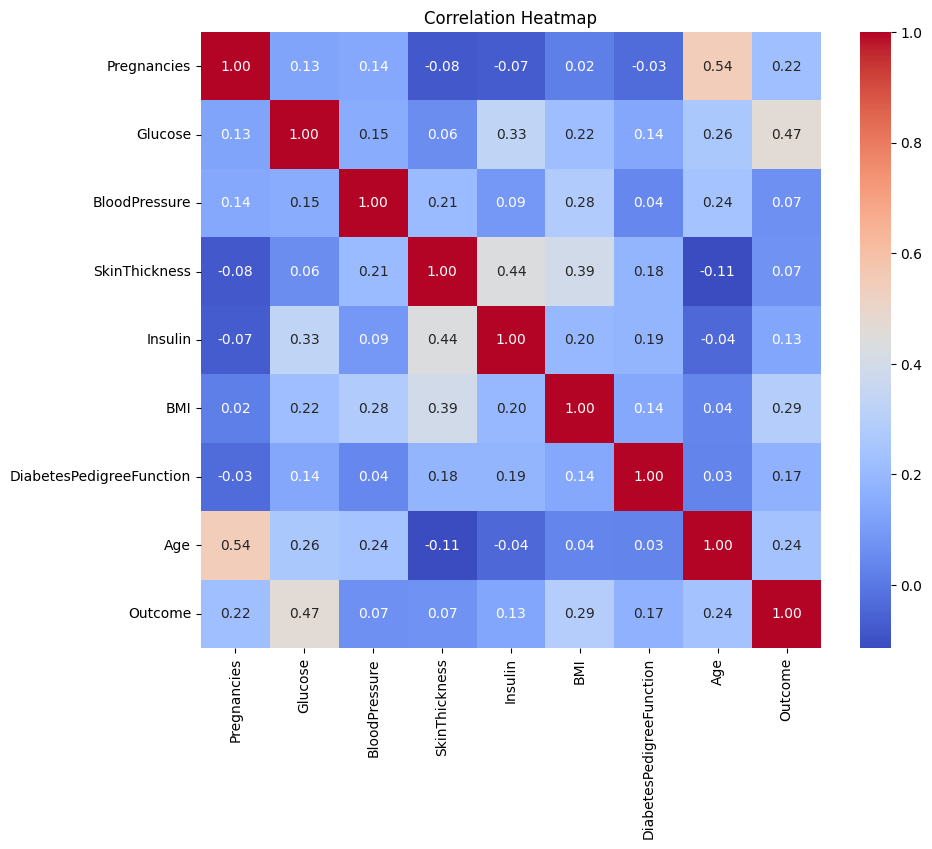

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Data Preprocessing
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Training and Hyperparameter Tuning
models = {
    'Logistic Regression': (LogisticRegression(max_iter=200), {}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}),
    'Support Vector Machine': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    'Naive Bayes': (GaussianNB(), {})
}


In [ ]:
results = {}

In [ ]:
for model_name, (model, params) in models.items():
    if params:
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7532
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

[[79 20]
 [18 37]]
K-Nearest Neighbors Accuracy: 0.6948
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

[[79 20]
 [27 28]]
Random Forest Accuracy: 0.7338
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           

In [ ]:
# Final Score Comparison Table
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df)

                    Model  Accuracy
0     Logistic Regression  0.753247
1     K-Nearest Neighbors  0.694805
2           Random Forest  0.733766
3  Support Vector Machine  0.733766
4           Decision Tree  0.759740
5             Naive Bayes  0.766234


<ipython-input-33-72000df76838>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

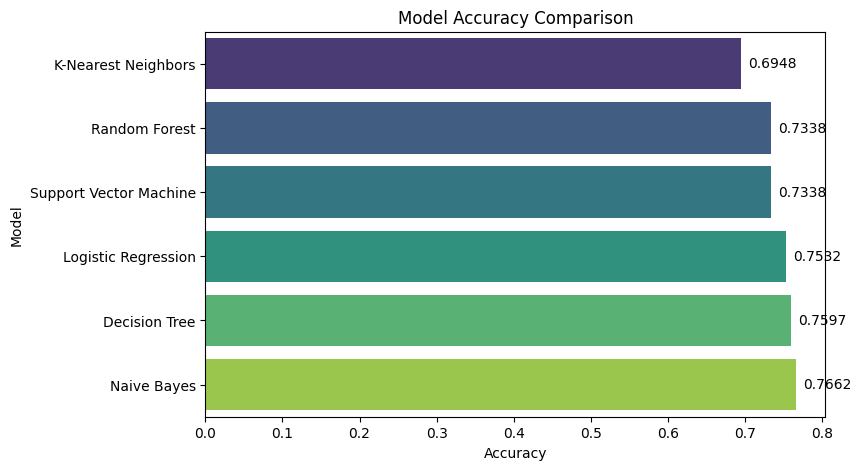

In [ ]:
# Bar chart comparison

# simple chart
# plt.figure(figsize=(10, 5))
# sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
# plt.title('Model Accuracy Comparison')
# plt.xlabel('Accuracy')
# plt.ylabel('Model')
# plt.show()

# Sort the results by Accuracy in ascending order
results_df = results_df.sort_values(by='Accuracy')

# Bar chart comparison with labels
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

# Add labels to each bar
for index, value in enumerate(results_df['Accuracy']):
    ax.text(value + 0.01, index, f'{value:.4f}', color='black', va="center")

# Title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')

plt.show()


In [ ]:
# Key Components of the Code:

# Data Loading and EDA:

# Loads the dataset and displays its basic information.
# Conducts exploratory data analysis with visualizations to understand the
# target variable distribution and feature correlations.

# Data Preprocessing:

# Splits the data into training and testing sets.
# Applies feature scaling to standardize the features.

# Model Training:

# Defines a dictionary of models and their hyperparameters.
# Uses GridSearchCV for hyperparameter tuning (where applicable).
# Trains each model and evaluates its performance on the test set.

# Results Visualization:

# Displays a comparison table of model accuracies.
# Creates a bar chart to visualize the performance of each model.

# Running the Code:

# Save the code in a Python file (e.g., diabetes_prediction.py) and run it in
# an environment with the required libraries installed (pandas, numpy, matplotlib, seaborn, and sklearn).
